In [245]:
import numpy as np
import matplotlib.pyplot as plt

photo 1

In [246]:
def add_skipped(l, n=11):
    return l + [float('nan')] * (n - len(l))
def drop_nan(m):
    return m[~np.isnan(m).any(axis=1)]


Video 1

In [247]:
p = "experiments/device/nov_23/pV8-4.txt"
# p = "pV_4-2.txt"
f = open(p, "r")
data = np.array([add_skipped([float('nan') if j == "" else float(j)  for j in i.strip().split("\t")], 5) for i in f.readlines()[3:]])

In [248]:
t = data[:-16, 0]

In [249]:
X_level = data[:-16, 1]
X_refs = data[:, 3]
X_refs = X_refs[~np.isnan(X_refs)]


In [250]:
X_volumes =np.array([0] + list(np.arange(0, 16)*100 + 350))

In [251]:
V_interp = lambda xx: np.interp(xx, X_refs, X_volumes)

In [252]:
Vs = V_interp(X_level)

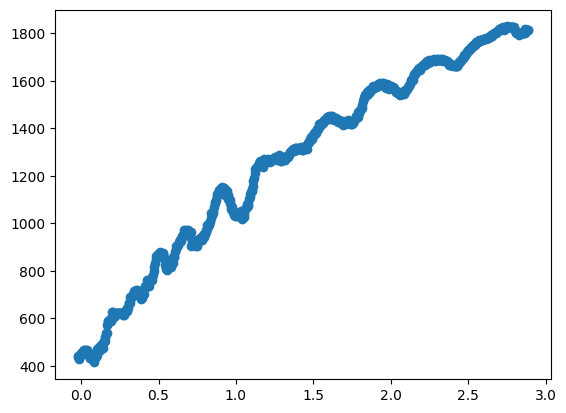

In [253]:
plt.scatter(t-7.75, Vs)

In [254]:
# t = data[:, 0]
# X = data[:, 1]*s_to_cm
# Y = data[:, 2]*s_to_cm

In [255]:
# plt.plot(pnts[:, 0], pnts[:, 1])
# plt.plot(pnts_2[:, 0], pnts_2[:, 1])
# plt.scatter(ref_pnts[:, 0], ref_pnts[:, 1])
# plt.scatter(X, Y)
# plt.gca().set_aspect('equal')


In [256]:
# Vs = np.array([quad(lambda x: (r_interp(x)**2)*np.pi, ref_pnts[0, 0], xx, )[0] for xx in X]) + ref_V[0]

In [257]:
# if "8-1" in p:
#     T = t-27.5
# if "4-2" in p:
#     T = t-27.5 + 8 - 0.15

T = t-7.75

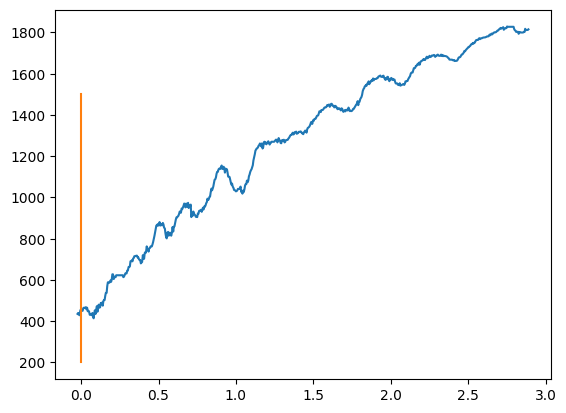

In [258]:
plt.plot(T, Vs)
plt.plot([0, 0], [200, 1500])

In [259]:
np.save("T.npy", T)
np.save("Vs.npy", Vs)

In [260]:
p = "experiments/device/nov_23/pV_8-4_1.csv"
# p = "pV_4-2_1.csv"
f = open(p, "r")
data_pico = np.array([[float('nan') if j == "" else float(j)  for j in i.strip().split(",")] for i in f.readlines()[3:]])
# data_pico = 

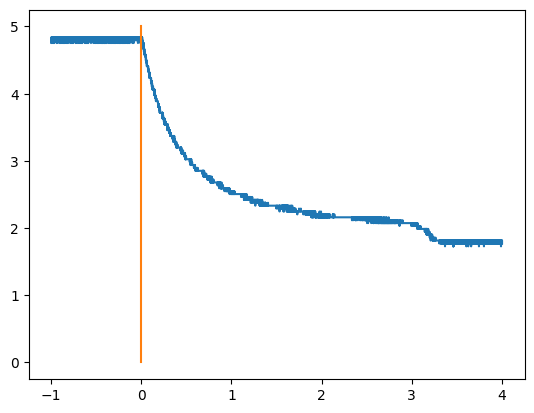

In [261]:
plt.plot(data_pico[:, 0]-1, data_pico[:, 2])
plt.plot([0, 0], [0, 5])

In [262]:
def V_to_P(u):
    return (u - 1.9815) / 0.4697 + 1
    

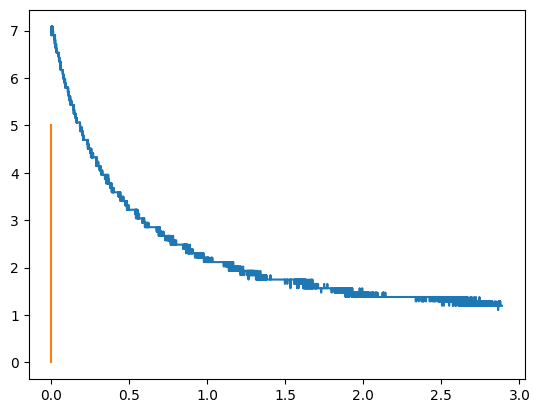

In [272]:
# if "4-2" in p:
#     T_pico = data_pico[:, 0]-2.5
# if "8-1" in p:
#     T_pico = data_pico[:, 0]-0.76

T_pico = data_pico[:, 0] - 1

mask = (T_pico < np.max(T)) & (T_pico > 0)
T_pico = T_pico[mask]
P_pico = V_to_P(data_pico[:, 2][mask])
plt.plot(T_pico, P_pico)
plt.plot([0, 0], [0, 5])

In [273]:
V_pico = np.interp(T_pico, T, Vs)

In [274]:
from scipy.ndimage import gaussian_filter

In [275]:
# from scipy.optimize import curve_fit

# def f(x, A, B): # this is your 'straight line' y=f(x)
#     return A*x + B

# popt, pcov = curve_fit(f, x, y) # your data x, y to fi

In [276]:

slope, intercept = np.polyfit(T_pico, np.gradient(gaussian_filter(V_pico, sigma=5))/np.gradient(T_pico), deg=1)

In [277]:
a3, a2, a1, a0 = np.polyfit(T_pico, V_pico, deg=3)
# a2, a1, a0 = np.polyfit(T_pico, V_pico, deg=2)
# a3 = 0

In [278]:
V_pico[0]

np.float64(452.52758662952624)

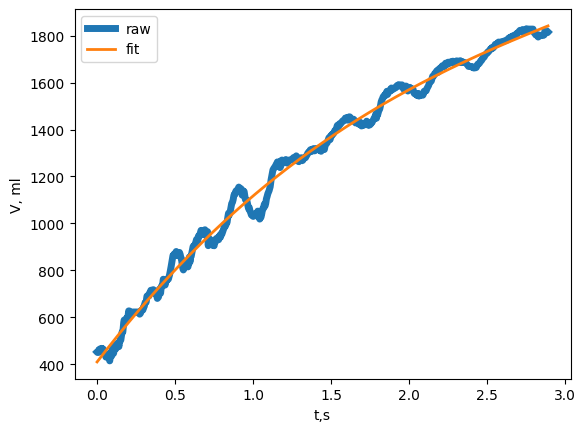

In [279]:
plt.plot(T_pico, V_pico, linewidth=5, label="raw")
plt.plot(T_pico, a3*T_pico**3 + a2*T_pico**2 + a1*T_pico + a0, linewidth=2, label="fit")
plt.xlabel("t,s")
plt.ylabel("V, ml")
plt.legend()

In [280]:
b2 = a3*3
b1 = a2*2
b0 = a1

In [281]:
b2,b1,b0

(np.float64(50.84673692016554),
 np.float64(-356.10182065002675),
 np.float64(868.2397850796167))

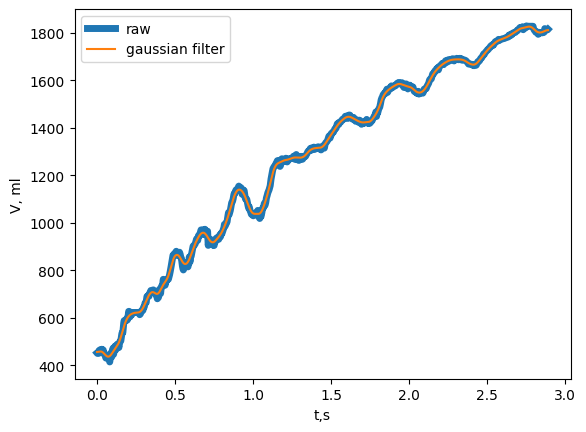

In [282]:
plt.plot(T_pico, V_pico, linewidth=5, label="raw")
plt.plot(T_pico, gaussian_filter(V_pico, sigma=50), label="gaussian filter")
plt.xlabel("t,s")
plt.ylabel("V, ml")
plt.legend()

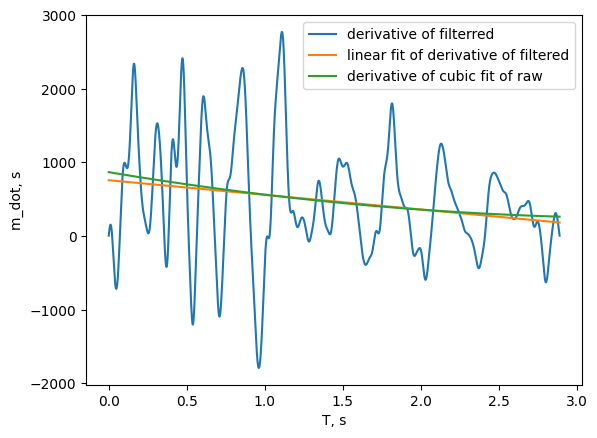

In [283]:
# plt.plot(T_pico, np.gradient(V_pico)/np.gradient(T_pico), label="derivative of raw")
plt.plot(T_pico, np.gradient(gaussian_filter(V_pico, sigma=50))/np.gradient(T_pico), label="derivative of filterred")
plt.plot(T_pico, T_pico*slope + intercept, label="linear fit of derivative of filtered")
plt.plot(T_pico, b2*T_pico**2 + b1*T_pico + b0, label="derivative of cubic fit of raw")
plt.xlabel("T, s")
plt.ylabel("m_dot, s")
plt.legend()

In [284]:
mask = P_pico > 1

In [285]:
from scipy import 

SyntaxError: invalid syntax (78068920.py, line 1)

Text(0.5, 0, 'P, atm')

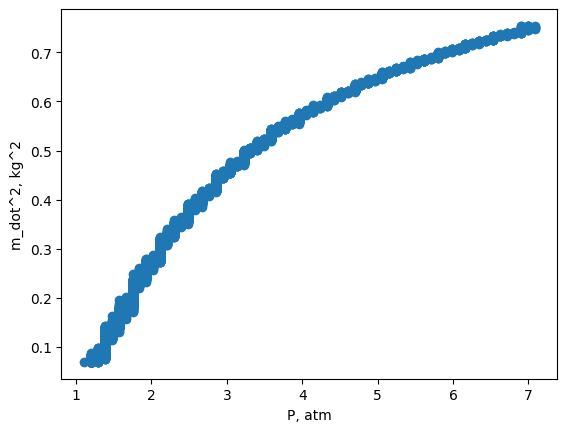

In [286]:
plt.scatter(P_pico[mask], ((b2*T_pico**2 + b1*T_pico + b0)/1000)[mask]**2)
# plt.plot()


plt.ylabel("m_dot^2, kg^2")
plt.xlabel("P, atm")

Text(0.5, 0, 'P, atm')

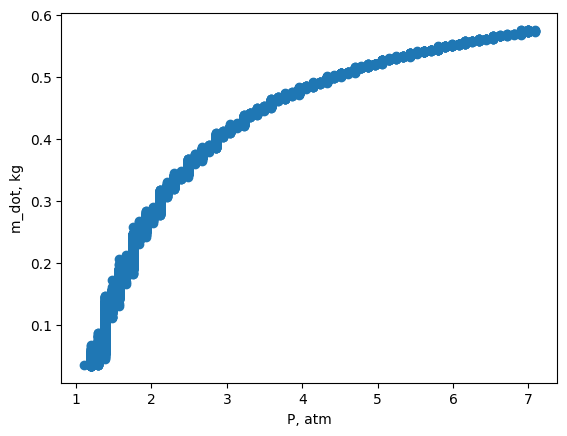

In [287]:
plt.scatter(P_pico[mask], ((T_pico[mask]*slope + intercept)/1000)**2)
# plt.plot()
plt.ylabel("m_dot, kg")
plt.xlabel("P, atm")

In [288]:
# plt.plot(T_pico, np.gradient(gaussian_filter(V_pico, sigma=20))/np.gradient(T_pico))


In [289]:
gamma = 1.4

In [290]:
def fit_b_K(P,V):
    from scipy.odr import ODR, Model, Data, RealData
    from scipy.optimize import curve_fit
    def f(beta, P):
        b, K = beta
        return K * P**b

    rdata = RealData(P, V, 0.2, 1)
    model = Model(f)
    odr = ODR(rdata, model, beta0=[-1, 3000])
    output = odr.run()
    return output.beta

In [291]:
def fit_gamma_K(P,V):
    from scipy.odr import ODR, Model, Data, RealData
    from scipy.optimize import curve_fit
    def f(beta, V):
        g, K = beta
        return K * V**(-g)

    rdata = RealData(V, P, 1, 0.2)
    model = Model(f)
    odr = ODR(rdata, model, beta0=[1, 1000])
    output = odr.run()
    return output.beta

In [292]:
def fit_K(P,V, g):
    from scipy.odr import ODR, Model, Data, RealData
    from scipy.optimize import curve_fit
    def f(beta, V):
        K, = beta
        return K * V**(-g)

    rdata = RealData(V, P, 1, 0.2)
    model = Model(f)
    odr = ODR(rdata, model, beta0=[100])
    output = odr.run()
    return output.beta

In [293]:
def fit_K_V0(P,V, g):
    from scipy.odr import ODR, Model, Data, RealData
    from scipy.optimize import curve_fit
    def f(beta, V):
        K, V0 = beta
        return K * (V-V0)**(-g)

    rdata = RealData(V, P, 1, 0.2)
    model = Model(f)
    odr = ODR(rdata, model, beta0=[4000, 0])
    output = odr.run()
    return output.beta

In [294]:
# def fit_K_(P,V, g):
#     from scipy.odr import ODR, Model, Data, RealData
#     from scipy.optimize import curve_fit
#     def f(beta, P):
#         K, = beta
#         return K * P**(1/-g)

#     rdata = RealData(P, V, 0.2, 1)
#     model = Model(f)
#     odr = ODR(rdata, model, beta0=[1000])
#     output = odr.run()
#     return output.beta

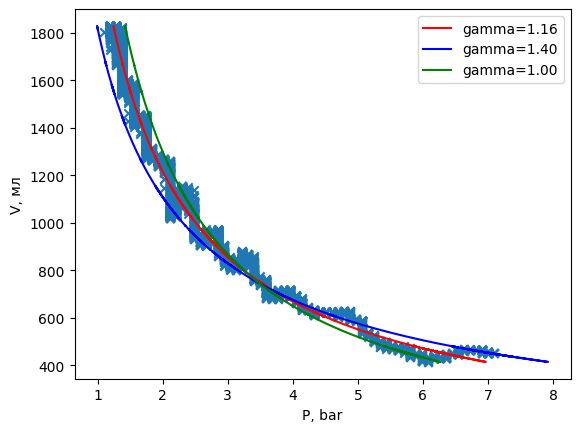

In [295]:
plt.scatter(P_pico, V_pico, marker="x")
# b, K = fit_b_K(P_pico, V_pico)

# gamma = -1/b

# plt.plot(P_pico, K * P_pico**b, label=f"gamma={gamma:.2f}")
gamma, K = fit_gamma_K(P_pico, V_pico)
plt.plot(K * V_pico**(-gamma), V_pico, label=f"gamma={gamma:.2f}", c="r")

gamma = 1.4
K, = fit_K(P_pico, V_pico, gamma)
plt.plot(K * V_pico**(-gamma), V_pico, label=f"gamma={gamma:.2f}", c="b")


gamma = 1
K, = fit_K(P_pico, V_pico, gamma)
plt.plot(K * V_pico**(-gamma), V_pico, label=f"gamma={gamma:.2f}", c="g")

# gamma = 1
# K,V0 = fit_K_V0(P_pico, V_pico, gamma)
# plt.plot(K * (V_pico-V0)**(-gamma), V_pico, label=f"gamma={gamma:.2f}")


# gamma = 1
# K, = fit_K_(P_pico, V_pico, gamma)
# plt.plot(K * V_pico**(-gamma), V_pico, label=f"gamma={gamma:.2f}")



plt.xlabel("P, bar")
plt.ylabel("V, мл")
plt.legend()

/tmp/ipykernel_9869/3222472325.py:6: RuntimeWarning: invalid value encountered in power
  return K * (V-V0)**(-g)


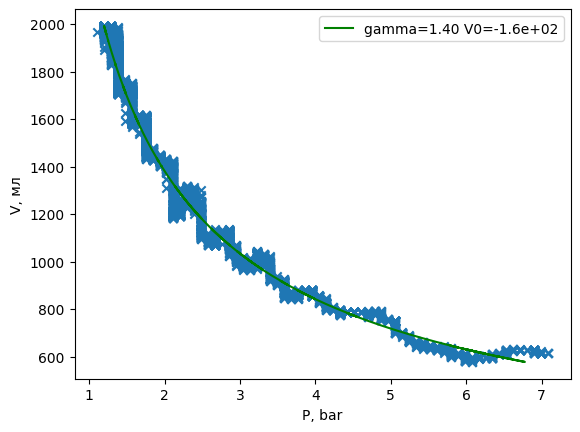

In [296]:
# plt.scatter(P_pico, V_pico, marker="x")
# b, K = fit_b_K(P_pico, V_pico)

# gamma = -1/b

# plt.plot(P_pico, K * P_pico**b, label=f"gamma={gamma:.2f}")
# gamma, K = fit_gamma_K(P_pico, V_pico)
# plt.plot(K * V_pico**(-gamma), V_pico, label=f"gamma={gamma:.2f}")

# gamma = 1.4
# K, = fit_K(P_pico, V_pico, gamma)
# plt.plot(K * V_pico**(-gamma), V_pico, label=f"gamma={gamma:.2f}")


# gamma = 1
# K, = fit_K(P_pico, V_pico, gamma)
# plt.plot(K * V_pico**(-gamma), V_pico, label=f"gamma={gamma:.2f}")

# gamma = 1
# K,V0 = fit_K_V0(P_pico, V_pico, gamma)
# plt.plot(K * (V_pico-V0)**(-gamma), V_pico-V0, label=f"gamma={gamma:.2f} V0={(V0):.2}", c="r")


gamma = 1.4
K,V0 = fit_K_V0(P_pico, V_pico, gamma)
plt.plot(K * (V_pico-V0)**(-gamma), V_pico-V0, label=f"gamma={gamma:.2f} V0={(V0):.2}", c="g")

plt.scatter(P_pico, V_pico-V0, marker="x")
# gamma = 1
# K, = fit_K_(P_pico, V_pico, gamma)
# plt.plot(K * V_pico**(-gamma), V_pico, label=f"gamma={gamma:.2f}")



plt.xlabel("P, bar")
plt.ylabel("V, мл")
plt.legend()

In [238]:
ref_V

NameError: name 'ref_V' is not defined

In [239]:
# plt.scatter(P_pico, V_pico)
# b, K = fit_gamma_K(P_pico, V_pico)

# # gamma = -1/b

# plt.plot(P_pico, K * P_pico**b, label=f"gamma={gamma:.2f}")
# plt.xlabel("P, bar")
# plt.ylabel("V, мл")
# plt.legend()

/tmp/ipykernel_9869/190007786.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


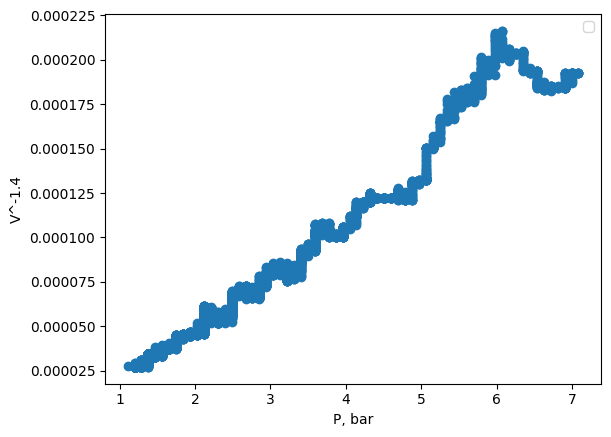

In [240]:
plt.scatter(P_pico, V_pico**(-1.4))
plt.xlabel("P, bar")
plt.ylabel("V^-1.4")
plt.legend()

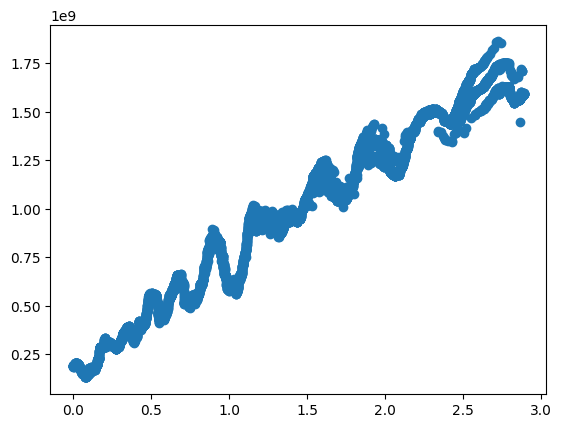

In [241]:
plt.scatter(T_pico, np.power(V_pico,2.8) * P_pico)

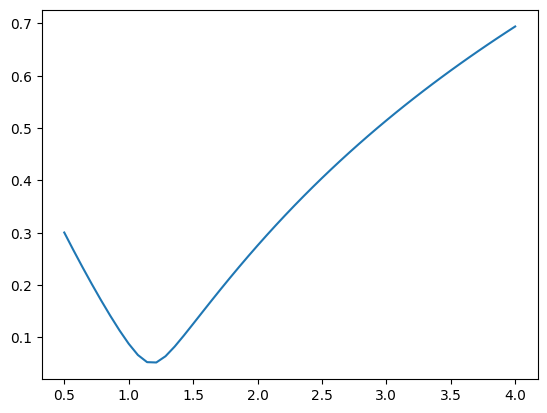

In [242]:
nnnnn = []
gamma = np.linspace(0.5, 4, 50)
for g in gamma:
    seq = np.power(V_pico,g) * P_pico
    nnnnn.append(np.std(seq/np.mean(seq)))
plt.plot(gamma, nnnnn)